In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib inline

import sys
sys.executable

'c:\\Data\\Projects\\phd\\cdl\\env\\Scripts\\python.exe'

In [2]:
from dino.environments.playground import PlaygroundEnvironment
from exlab.interface.graph import display
from dino.utils.move import MoveConfig
env = PlaygroundEnvironment()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Windows (64bit) [c:\Data\Projects\phd\cdl\env\lib\site-packages\pymunk\chipmunk.dll]
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'PlaygroundEnvironment' has been started


In [3]:
env.displayGui(True)

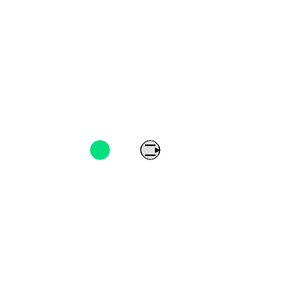

In [4]:
# env.displayGui(True)
env.image()

In [5]:
from cdl.agents.learners.curiosity.saggriac import SAGGLearner
learner = SAGGLearner(env.world.findHost())

2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'ModelDataset' has been started
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'ModelDataset' has been started
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'Agent' has been started
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'Performer' has been started
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'planner' has been started
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'ModelDataset' has been attached to 'Agent'
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'InterestModelManager' has been started
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'Strategy autonomousStrategy' has been started
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [modular] Module 'Strategy autonomousStrategy' has been started


In [6]:
from cdl.agents.tools.models.interest_model import InterestModel
# mnc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'))
mc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'))
mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
mo = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))
mrpp = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
mop = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))

2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [model] New model added: Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#9‚ÜùüëÅ'#Agent.lidar':PRE‚Üï8 => @‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2)
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [model] New model added: Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2)
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [model] New model added: Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#16‚ÜùüëÅ'#Cylinder1.position'‚Üï2)
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [model] New model added: Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2)
2020-09-29 16:39:12 RedSky exlogger:c[23224] INFO [model] New model added: Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Ü

In [7]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(logging.DEBUG, 'strategy')
# logger().setDisplayLevel(logging.DEBUG, 'strategy')
# logger().setRecordLevel(Logger.DEBUG2, 'plan')
# logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().display(tag='plan')

In [8]:
competences = {}

In [13]:
for _ in range(5):
    learner.train(20)
    env.run()

    competences[learner.iteration] = learner.dataset.competences(precise=True)

Should del context column 1 (+0.16144988333411445) around Observation[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-6.465, -18.158]
Updating current area
2020-09-29 16:40:22 RedSky exlogger:c[23224] INFO [performer] Iter 3: max derive exceeded (10.666445953502732 > 7.284829638909129) trying to reach Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-14.081,  18.572] by doing Data[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 13.910, -9.931]
2020-09-29 16:40:22 RedSky exlogger:c[23224] INFO [performer] Replanning...
2020-09-29 16:40:22 RedSky exlogger:c[23224] INFO [performer] Iter 3: max derive exceeded (19.573906994506586 > 7.284829638909129) trying to reach Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-17.103, -12.101] by doing Data[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 16.198, -7.438]
2020-09-29 16:40:22 RedSky exlogger:c[23224] INFO [performer] Replanning...
Should del context column 1 (+0.09878127196783867) around Observation[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò

In [14]:
competences

{21: {Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#9‚ÜùüëÅ'#Agent.lidar':PRE‚Üï8 => @‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2): 0.9999958452727274,
  Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2): 0.002787527825448727,
  Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#16‚ÜùüëÅ'#Cylinder1.position'‚Üï2): 0.00033210800162348673,
  Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2): 0.0017472360476703376,
  Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#16‚ÜùüëÅ'#Cylinder1.position'‚Üï2): 0.00033210800162348673},
 46: {Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#9‚ÜùüëÅ'#Agent.lidar':PRE‚Üï8 => @‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2): 0.9996661831808348,
  Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚Üùüë

In [ ]:
learner.iteration

In [ ]:
learner.interestModel.sampleBestPoint()

In [82]:
goal = learner.propertySpace('#Cylinder1.positionToAgent').point([50, 0]).setRelative(False)
learner.planner.planDistance(goal)

2020-09-29 15:28:59 RedSky exlogger:c[6880] DEBUG [plan] Parting space to find models reaching @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2
DEBUG:exlogger:c:[plan] Parting space to find models reaching @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2
2020-09-29 15:29:00 RedSky exlogger:c[6880] DEBUG [plan] === New planning (d0) === -> Goal[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞ 50.000,  0.000] using Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2) with context None
DEBUG:exlogger:c:[plan] === New planning (d0) === -> Goal[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞ 50.000,  0.000] using Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2) with context None
2020-09-29 15:29:00 RedSky exlogger:c[6880] DEBUG [plan] == Relative goal is Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-8.

(<<
     <class 'dino.data.data.Data'>(#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 2.778,  18.936 - to reach‚Üí #12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-2.360, -18.888)
 ->  <class 'dino.data.data.Data'>(#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 0.243,  17.181 - to reach‚Üí #12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 0.322, -17.115)
 ->  <class 'dino.data.data.Data'>(#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 29.505,  15.217 - to reach‚Üí #12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-13.255, -25.147)
 ->  <class 'dino.data.data.Data'>(#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬±-6.510, -1.498 - to reach‚Üí #12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 6.590,  1.523)
 >>,
 State ([SingleData(#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞[' 321.570', ' 403.185']), SingleData(#20‚ÜùüëÅ'#Agent.positionToAgent'‚Üï2 @‚ò∞[' 0.000', ' 0.000']), SingleData(#8‚ÜùüëÅ'#Agent.lidar'‚Üï8 @‚ò∞[' 100.000', ' 53.750', ' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 100.000']), SingleData(#16‚Üùü

In [62]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').goal([-10.882,  11.432]), context=env.state().context())

(Data[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 10.874, -10.697],
 Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-10.273,  11.251],
 Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬± 60.882, -11.432],
 0.906394354535861,
 0.02303257494037246,
 0.6352862115428772)

In [54]:
mrpp.forward(learner.propertySpace('Agent.position').action([10.960, -10.059]), context=env.state().context())

(Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-10.239,  11.086],
 0.05294395427152654)

In [ ]:
[config.results() for config in learner.configHistory]

In [101]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(Logger.DEBUG2, 'strategy')
# logger().setDisplayLevel(Logger.DEBUG2, 'strategy')
logger().setRecordLevel(Logger.DEBUG2, 'plan')
logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().display(tag='plan')

In [192]:
learner.dataset.competences(precise=True)

{Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#9‚ÜùüëÅ'#Agent.lidar':PRE‚Üï8 => @‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2): 0.997103916828937,
 Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2): 0.6301499312166416,
 Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#16‚ÜùüëÅ'#Cylinder1.position'‚Üï2): 0.3941398829142671,
 Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2): 0.8737835365693531}

In [195]:
learner.dataset.competences(precise=True)

{Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#9‚ÜùüëÅ'#Agent.lidar':PRE‚Üï8 => @‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2): 0.997103916828937,
 Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2): 0.6301499312166416,
 Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#16‚ÜùüëÅ'#Cylinder1.position'‚Üï2): 0.3941398829142671,
 Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2): 0.9158022547207421}

In [55]:
mrpp.competence(precise=True)

Failed 0.1286914471657426 #2: [20.43785524485969, -14.698269506184317] + None -> [-20.43785524485969, 14.698269506184317] vs estimated [-11.089599707424039, 12.928075337382605]
Failed 0.1589217855302404 #6: [21.490543872702915, 10.860232743287725] + None -> [-21.490543872702915, -10.860232743287725] vs estimated [-14.35958440755384, -1.5223013297438754]
Failed 0.1328250814297582 #7: [-24.536297633911545, 23.741210967861377] + None -> [24.536297633911545, -23.741210967861377] vs estimated [20.123209469723662, -14.968706399551564]
Failed 0.23961783997875227 #10: [-20.837727252322793, 25.973742567299496] + None -> [-2.7547263284440078, -22.56168396661701] vs estimated [14.768342139733555, -19.95857782109271]
Failed 0.1394702948660948 #15: [19.728627323227897, 10.958985969579714] + None -> [-19.728627323227897, -10.958985969579714] vs estimated [-14.716018757904642, -1.9480884373097993]
Failed 0.5 #38: [23.617857169781928, 17.411504132311222] + None -> [-23.617857169781928, -17.41150413231

0.010627182513158397

In [193]:
mrpp.contextSpacialization[0].allTrue()

In [194]:
mrpp.competence(precise=True)

0.9158022547207421

In [33]:
mrp.competence(precise=True)

Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.301,  0.331] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-48.957, -0.518] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-7.882, -8.651]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.941,  0.909] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-137.325, -0.672] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 24.536, -23.741]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.244,  0.268] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-41.994,  0.687] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-6.358, -6.993]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.943, -0.522] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬± 57.438,  0.708] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 24.662,  13.672]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.776, -0.607] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-50.108, -1.402] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Ü

0.02498762306714571

In [66]:
mrp.eventForwardError(467)

Failed 0.11966122421289227 #467: Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-6.703, -6.332] vs Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-13.828, -0.716]


0.11966122421289227

In [102]:
eventId = 85
action = mrp.actionSpace.getPoint(eventId)[0]
outcome = mrp.outcomeSpace.getPoint(eventId)[0]
context = mrp.contextSpace.getPoint(eventId)[0]
print(action)
mrp.inverse(outcome, context=context)

Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.911,  0.016]


(Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.911,  0.016],
 Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 15.456,  1.196],
 Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-11.659,  52.723],
 0.00033210800162348673,
 0.11090065073282102,
 8.515184088959161)

In [101]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=context)

(Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.117, -0.011],
 Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-1.663,  1.446],
 Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-11.659,  52.723],
 0.005171042875076537,
 0.0869397877785872,
 4.881968537940924)

In [86]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=env.state().context())

---
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.233,  0.337] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-17.626,  63.545] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 6.078, -8.756]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.243, -0.829] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-20.295,  88.324] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 6.369,  21.660]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.544,  0.048] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-25.446,  77.395] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-14.250, -1.214]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.137,  0.531] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬± 6.178,  62.850] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-3.590, -13.834]
Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬±-0.270,  0.116] + Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-24.498,  59.902] -> Data[#12‚ÜùüëÅ'#Cylinder1.positionToAg

(Data[#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.076,  0.038],
 Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬± 24.670,  10.059],
 Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬±-5.480,  83.664],
 0.00033210800162348673,
 0.22155576499888532,
 23.891168205932388)

In [61]:
from sklearn import linear_model
import numpy as np

ids = [467, 331, 148, 490, 355, 491, 199, 192, 197, 481]
actions = mrp.actionSpace.getNpPlainPoint(ids)
outcomes = mrp.outcomeSpace.getNpPlainPoint(ids)
contexts = mrp.contextSpace.getNpPlainPoint(ids)

lin = linear_model.LinearRegression()
lin.fit(actions, outcomes)

ransac = linear_model.RANSACRegressor()
ransac.fit(actions, outcomes)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [62]:
inlier_mask

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [63]:
ransac.predict(np.array([[0.825, -0.313]]))

array([[-15.90251782,   1.56135912]])

In [64]:
lin.predict(np.array([[0.825, -0.313]]))

array([[-12.99085217,  -0.59400853]])

In [54]:
ransac.score(actions[inlier_mask], outcomes[inlier_mask])

0.997727330981186

In [53]:
lin.score(actions, outcomes)

0.9232581026223529

In [21]:
mrp.contextSpace.maxDistance

120

In [19]:
import numpy as np
for area in mrpp.contextSpacialization[1].areas:
    area.columns = np.array([True, True])

In [ ]:
[area.columns for area in mo.contextSpacialization[0].areas]

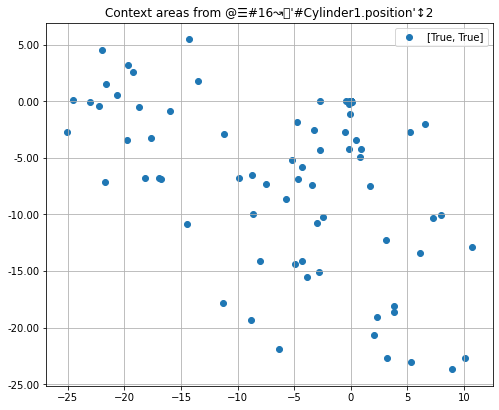

In [28]:
display(mop.contextSpacialization[0].visualizeAreas())

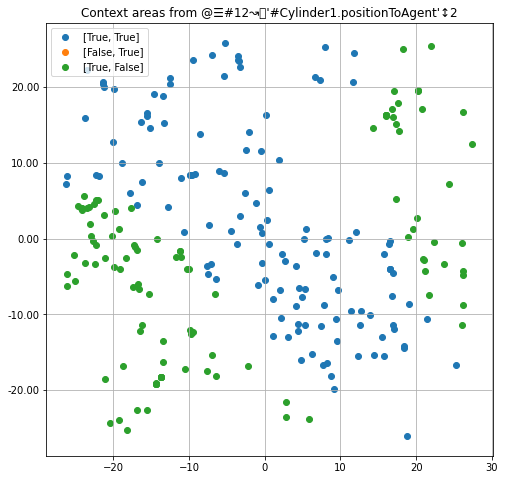

In [27]:
display(mrpp.contextSpacialization[0].visualizeAreas())

In [18]:
mrp.contextSpacialization[1]._resetAreas()

In [ ]:
# display(mc.contextSpacialization[1].visualizeAreas())

In [15]:
learner.reach(learner.propertySpace('Agent.position').point([50, 0]).setRelative(True))
env.run()

2020-09-29 13:46:29 RedSky exlogger:c[6412] DEBUG [strategy] goal exploration decision: criteria=-1.0->useGoal=True exploration=True path=<<
    <class 'dino.data.data.Data'>(#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.806, -0.018 - to reach‚Üí #7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 21.062, -0.449)
->  <class 'dino.data.data.Data'>(#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.729,  0.147 - to reach‚Üí #7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 19.064,  3.863)
->  <class 'dino.data.data.Data'>(#6‚Üùüïπ'#Agent.move'‚Üï2 @‚ò∞¬± 0.376, -0.128 - to reach‚Üí #7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 9.870, -3.328)
>>


In [17]:
config = MoveConfig(goal=learner.propertySpace('#Cylinder1.positionToAgent').point([-60, 0]).setRelative(False))
# config.plannerSettings.dontMoveSpaces.append(learner.propertySpace('#Cylinder1.position'))
learner.reach(config)
env.run()

2020-09-29 16:43:23 RedSky exlogger:c[23224] INFO [interest] Creating interestMap for model Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2), strategy None
2020-09-29 16:43:23 RedSky exlogger:c[23224] INFO [interest] Creating interestMap for model Model(@‚ò∞#6‚Üùüïπ'#Agent.move'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#16‚ÜùüëÅ'#Cylinder1.position'‚Üï2), strategy None
Done.
2020-09-29 16:43:24 RedSky exlogger:c[23224] INFO [interest] Creating interestMap for model Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2), strategy None
2020-09-29 16:43:24 RedSky exlogger:c[23224] INFO [interest] Creating interestMap for model Model(@‚ò∞#7‚ÜùüëÅ'#Agent.position'‚Üï2 | @‚ò∞#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 => @‚ò∞#16‚ÜùüëÅ'#Cylinder1.position'‚Üï2), strategy None
Should d

In [139]:
env.world.observe()

Observation[Observation[#0‚ÜíüëÅ'#Agent.position'‚Üï2 @¬± 346.885,  517.428]
    Observation[#1‚ÜíüëÅ'#Agent.positionToAgent'‚Üï2 @¬± 0.000,  0.000]
    Observation[#2‚ÜíüëÅ'#Agent.lidar'‚Üï8 @¬± 100.000,  100.000,  100.000,  100.000,  100.000,  100.000,  100.000,  36.237]
    Observation[#4‚ÜíüëÅ'#Cylinder1.position'‚Üï2 @¬± 380.339,  462.845]
    Observation[#5‚ÜíüëÅ'#Cylinder1.positionToAgent'‚Üï2 @¬± 33.455, -54.583]]

In [26]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([-20, 0]).setRelative(True))
env.run()

Done.


In [165]:
mrpp.forward(learner.propertySpace('Agent.position').action([22.107, -2.817]), context=env.state().context())

(Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-22.107,  2.817],
 0.06640657476773264)

In [164]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([-12.170,  0.149]), context=env.state().context())

Score 0.018267095014639093 a Action[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 12.805, -0.033] y0 [-11.3842822   -0.70832459] [-12.17    0.149]
Score 0.06854354937288955 a Action[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 22.106, -2.814] y0 [-16.49991489   0.68998586] [-12.17    0.149]
Score 0.0247476378125865 a Action[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 16.073,  0.427] y0 [-13.0446842   -1.16135593] [-12.17    0.149]
Score 0.01826709501463911 a Action[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 12.805, -0.033] y0 [-11.3842822   -0.70832459] [-12.17    0.149]
Score 0.018267095014639103 a Action[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 12.805, -0.033] y0 [-11.3842822   -0.70832459] [-12.17    0.149]
Score 0.01826709501463913 a Action[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 12.805, -0.033] y0 [-11.3842822   -0.70832459] [-12.17    0.149]
Score 0.3166041508199217 a Action[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬±-7.985, -0.284] y0 [7.98502005 0.28372915] [-12.17    0.149]
Score 0.3166041508199218 a Action[#7‚Üù

(Data[#7‚ÜùüëÅ'#Agent.position'‚Üï2 @‚ò∞¬± 12.805, -0.033],
 Data[#12‚ÜùüëÅ'#Cylinder1.positionToAgent'‚Üï2 @‚ò∞¬±-11.384, -0.708],
 Data[#13‚ÜùüëÅ'#Cylinder1.positionToAgent':PRE‚Üï2 @‚ò∞¬± 59.952, -59.978],
 0.09260194826144522,
 0.0667099003592936,
 1.1629092390134033)

In [ ]:
learner.propertySpace('Agent.move').convertTo(spaceManager=learner.dataset)

In [ ]:
env.spaces

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([0, -10]).setRelative(True))
env.run()

In [ ]:
learner.propertySpace('Agent.position').point([0, 0])

In [ ]:
learner.dataset.spaces

In [ ]:
learner.dataset.spaces[7].maxDistancePerColumn

In [ ]:
learner.dataset.spaces[7]

In [ ]:
learner.propertySpace('Agent.move').maxDistancePerColumn

In [ ]:
env.world.observe()

In [ ]:
env.iteration

In [ ]:
learner.iteration

In [ ]:
learner.dataset.spaces[0].number

In [ ]:
learner.dataset.spaces[0].data

In [ ]:
env.iteration

In [ ]:
print(mc)
print(mnc)

In [ ]:
print(mnc.competence(precise=True))
print(mc.competence(precise=True))
print(mo.competence(precise=True))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


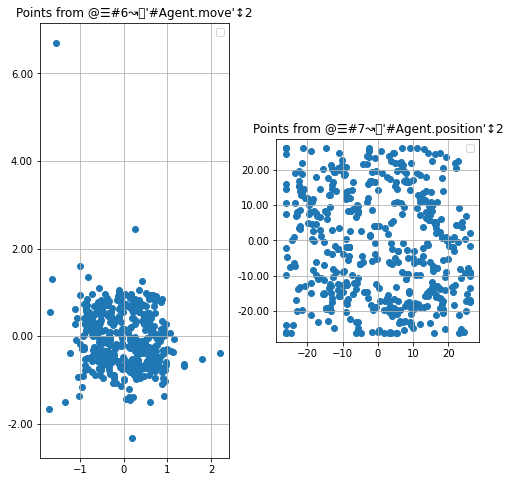

In [36]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('Agent.position').visualizeData())

No handles with labels found to put in legend.
No handles with labels found to put in legend.


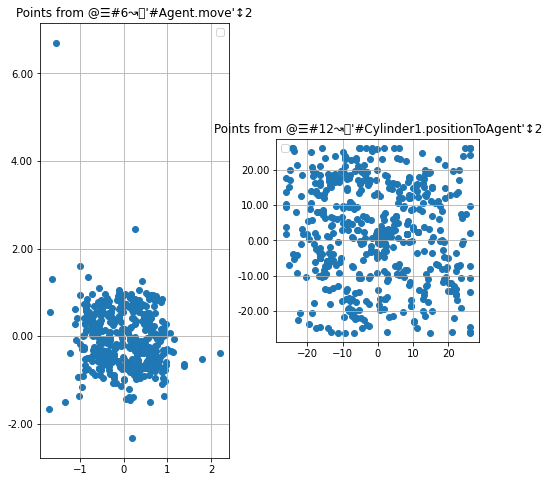

In [37]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder1.positionToAgent').visualizeData())

No handles with labels found to put in legend.
No handles with labels found to put in legend.


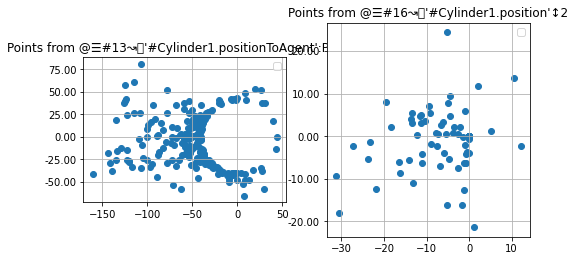

In [14]:
from dino.data.space import SpaceKind
display(learner.propertySpace('#Cylinder1.positionToAgent', kind=SpaceKind.PRE).visualizeData(), learner.propertySpace('#Cylinder1.position').visualizeData())

In [ ]:
im = list(learner.dataset.models[0].interestMaps.values())[0]
display(im.visualizeData())

In [ ]:
im